In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
tweet_data = pd.read_csv('dog_rates_tweets.csv', parse_dates=True)

In [4]:
pattern_match = tweet_data.text.str.extract(r'(\d+(\.\d+)?)/10', expand=False)

In [5]:
rating_data = pattern_match[pattern_match[0] < 'NaN'][0]

In [6]:
rating_data = pd.to_numeric(rating_data)
rating_data = rating_data[rating_data <= 25.0]

In [7]:
tweet_data['rating'] = rating_data

In [8]:
final_data = tweet_data.loc[rating_data.index]

In [9]:
final_data['created_at'] = pd.to_datetime(final_data['created_at'], format='%Y-%m-%d %H:%M:%S')
final_data

,id,created_at,text,rating
2,994363623421153280,2018-05-09 23:48:56,b'This is Louie. He has misplaced his Cheerio....,14.0
7,993889039714578432,2018-05-08 16:23:07,b'This is Manny. He hasn\xe2\x80\x99t seen you...,13.0
8,993629544463642624,2018-05-07 23:11:58,b'This is Libby. She leap. 14/10\n(IG: libbyth...,14.0
24,992198572664860672,2018-05-04 00:25:48,b'This is Rosie. She thought Coachella was thi...,13.0
30,991744041351090177,2018-05-02 18:19:39,b'This is Riley. He\xe2\x80\x99ll be your chau...,13.0
35,991399795892916224,2018-05-01 19:31:45,b'This is B-Mo. He has a heart on his butt and...,13.0
41,990987750601093120,2018-04-30 16:14:26,b'Say hello to Meatball. I\xe2\x80\x99m told h...,13.0
50,989657223084244992,2018-04-27 00:07:23,b'This is Oakley. He picked you some flowers. ...,14.0
55,989300750152069120,2018-04-26 00:30:53,b'Meet Max. She pouts until someone holds her....,12.0
59,989176681243070464,2018-04-25 16:17:53,b'This is Trout. He lives a life of luxury. Pr...,13.0


In [10]:
def to_timestamp(d):
    return d.timestamp()
final_data['timestamp'] = final_data['created_at'].apply(to_timestamp)

In [11]:
fit = stats.linregress(final_data['timestamp'], final_data['rating'])
fit.slope, fit.intercept

(4.5650714150175902e-08, -55.954051128098499)

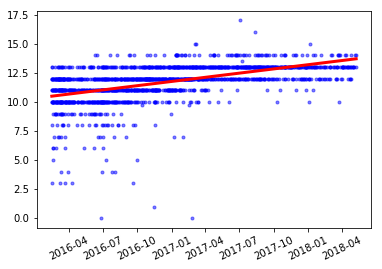

In [13]:
plt.xticks(rotation=25)
plt.plot(final_data['created_at'].values, final_data['rating'], 'b.', alpha=0.5)
plt.plot(final_data['created_at'].values, final_data['timestamp']*fit.slope + fit.intercept, 'r-', linewidth=3)
plt.show()

In [15]:
fit.pvalue

1.0838067353351561e-104

In [17]:
residuals = final_data['rating'] - (fit.slope*final_data['timestamp'] + fit.intercept)

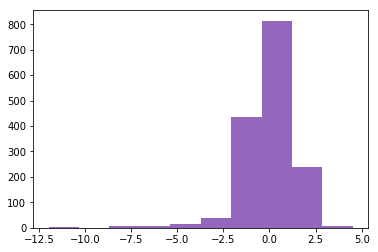

In [22]:
plt.hist(residuals)
plt.show()